In [1]:
import numpy as np
import pandas as pd

In [2]:
pheno_infname = '../base332.txt'

in_data_df = pd.read_csv(pheno_infname, sep='\t', dtype={'HospitalID': str})
print(in_data_df.shape)
in_data_df.head()

(332, 77)


,HDSampleID,SampleName,HospitalID,UMC,UMC2,ManualSevereType,Severity,SysSevereType,LastTimeOfSysSevereType,Gender,...,Urea,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT
0,D2002002751,1,0000223383,1.0,1,Moderate,A,2.0,2020-02-12,1,...,NaN,86.3,881.0,48.9,499.0,1.45,33.7,343.0,10.43,0.16
1,D2002002752,2,0000223107,0.0,0,Moderate,A,2.0,2020-01-23,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.17,0.22
2,D2002002753,3,0000222709,1.0,"1,5",Severe,B,NaN,NaN,2,...,1.95,66.4,551.0,47.3,392.0,2.83,16.7,139.0,NaN,0.16
3,D2002002754,4,0000222995,1.0,5,Critical,B,4.0,2020-02-16,1,...,9.81,30.3,93.0,18.7,58.0,1.72,10.9,33.0,79.45,0.12
4,D2002002755,5,0000223113,0.0,0,Moderate,A,2.0,2020-01-27,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,0.25


In [3]:
in_data_df['ManualSevereType'].value_counts()

Moderate        225
Severe           53
Asymptomatic     25
Critical         17
Mild             12
Name: ManualSevereType, dtype: int64

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8, 3),dpi=300)
sns.countplot(x="ManualSevereType", data=in_data_df, ax = ax, order=['Asymptomatic','Mild', 'Moderate', 'Severe', 'Critical'])

In [5]:
in_data_df.describe()

,UMC,SysSevereType,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,APTT,...,U/C,Urea,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,PCT
count,328.000000,305.000000,332.000000,332.000000,323.000000,332.000000,323.000000,313.000000,316.000000,327.000000,...,212.000000,212.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,318.000000
mean,0.442073,2.078689,1.530120,46.338133,137.588235,1.438524,189.746130,4.620319,4.950475,35.758104,...,66.693396,4.099387,65.649077,1046.907749,37.405904,590.760148,1.798672,24.062362,384.859779,0.200692
std,0.497392,0.538368,0.499845,17.299887,15.195030,0.722002,60.448612,0.517683,1.956594,5.767801,...,25.001437,1.499177,10.949080,575.164082,8.444404,329.641609,0.916789,8.381677,238.427057,0.060665
min,0.000000,1.000000,1.000000,1.750000,84.000000,0.160000,23.000000,2.670000,1.560000,22.000000,...,31.330000,1.720000,29.800000,93.000000,14.400000,58.000000,0.360000,4.800000,33.000000,0.030000
25%,0.000000,2.000000,1.000000,35.000000,127.000000,0.990000,145.000000,4.250000,3.640000,32.450000,...,50.042500,3.180000,58.800000,629.500000,32.000000,386.500000,1.210000,18.250000,203.000000,0.160000
50%,0.000000,2.000000,2.000000,49.000000,137.000000,1.275000,183.000000,4.610000,4.590000,35.200000,...,61.900000,3.865000,67.200000,974.000000,37.800000,536.000000,1.670000,23.100000,350.000000,0.190000
75%,1.000000,2.000000,2.000000,61.000000,146.000000,1.742500,225.000000,4.930000,5.652500,38.650000,...,75.892500,4.725000,73.050000,1338.500000,42.100000,737.000000,2.160000,28.600000,519.500000,0.240000
max,1.000000,4.000000,2.000000,86.000000,186.000000,6.870000,376.000000,6.610000,16.660000,84.900000,...,241.920000,14.120000,88.200000,4552.000000,61.900000,2626.000000,7.830000,56.800000,1685.000000,0.440000


In [6]:

col_name = list(in_data_df.columns)
unwant_col = ['HDSampleID', 'SampleName', 'Severity', 'SysSevereType', 
              'LastTimeOfSysSevereType', 'UMC2', 'Nationality', 'Hometown']
fisrt_labs_f = np.array([x for x in col_name if x not in unwant_col])
print(len(fisrt_labs_f))
fisrt_labs_f


69


array(['HospitalID', 'UMC', 'ManualSevereType', 'Gender', 'Age', 'HGB',
       'LYMPH#', 'PLT', 'RBC', 'WBC', 'APTT', 'D-DIC', 'FIB', 'PT', 'TT',
       '5NT', 'ALP', 'Ca*Pi', 'Ca++', 'CHE', 'CL', 'GGT', 'K', 'LDH',
       'MAO', 'Mg', 'Na', 'Pi-', 'A/G', 'ALB', 'ALT', 'AST', 'AST/ALT',
       'Bc-TR', 'DB', 'GLO', 'ID', 'm-AST', 'PA', 'TB', 'TBA', 'TP',
       'FIO2', 'Lac', 'LACT', 'O2AT', 'PCO2', 'PH', 'PO2', 'AG', 'CHOL',
       'CO2', 'Cr', 'CRP', 'eGFR', 'HDL', 'LDL', 'TG', 'U/C', 'Urea',
       'T-CELL', 'Tc-Count', 'Th-Cell', 'Th-Count', 'TH/TS', 'Ts-Cell',
       'Ts-Count', 'IL6', 'PCT'], dtype='<U16')

In [7]:
sel_data_df = in_data_df[fisrt_labs_f].copy()

In [8]:
# find columns being string data type
col_inx_has_str = [idx for idx,x in enumerate(sel_data_df.dtypes) if x != 'float64' and idx > 3 ]

# get the string-type column name
fisrt_labs_f[col_inx_has_str]

array(['D-DIC', 'GGT', 'ALT', 'CRP', 'IL6'], dtype='<U16')

In [9]:
# string data processing

# extract float value
float_regex = r'([+-]?\d+\.\d+|\d+)'
sel_data_df['D-DIC'] = sel_data_df['D-DIC'].str.extract(float_regex, expand=False)
sel_data_df['D-DIC'] = sel_data_df['D-DIC'].astype(float)

sel_data_df['GGT'] = sel_data_df['GGT'].str.extract(float_regex, expand=False)
sel_data_df['GGT'] = sel_data_df['GGT'].astype(float)

sel_data_df['ALT'] = sel_data_df['ALT'].str.extract(float_regex, expand=False)
sel_data_df['ALT'] = sel_data_df['ALT'].astype(float)

sel_data_df['CRP'] = sel_data_df['CRP'].str.extract(float_regex, expand=False)
sel_data_df['CRP'] = sel_data_df['CRP'].astype(float)

sel_data_df['IL6'] = sel_data_df['IL6'].str.extract(float_regex, expand=False)
sel_data_df['IL6'] = sel_data_df['IL6'].astype(float)



In [10]:
# calculate the nan counts for each column
dd = pd.DataFrame(sel_data_df.isnull().sum()).reset_index()
ddd = dd.rename(columns={"index": "feature", 0: "mis_val_count"})
ddd.sort_values(by='mis_val_count', ascending=False, inplace=True)


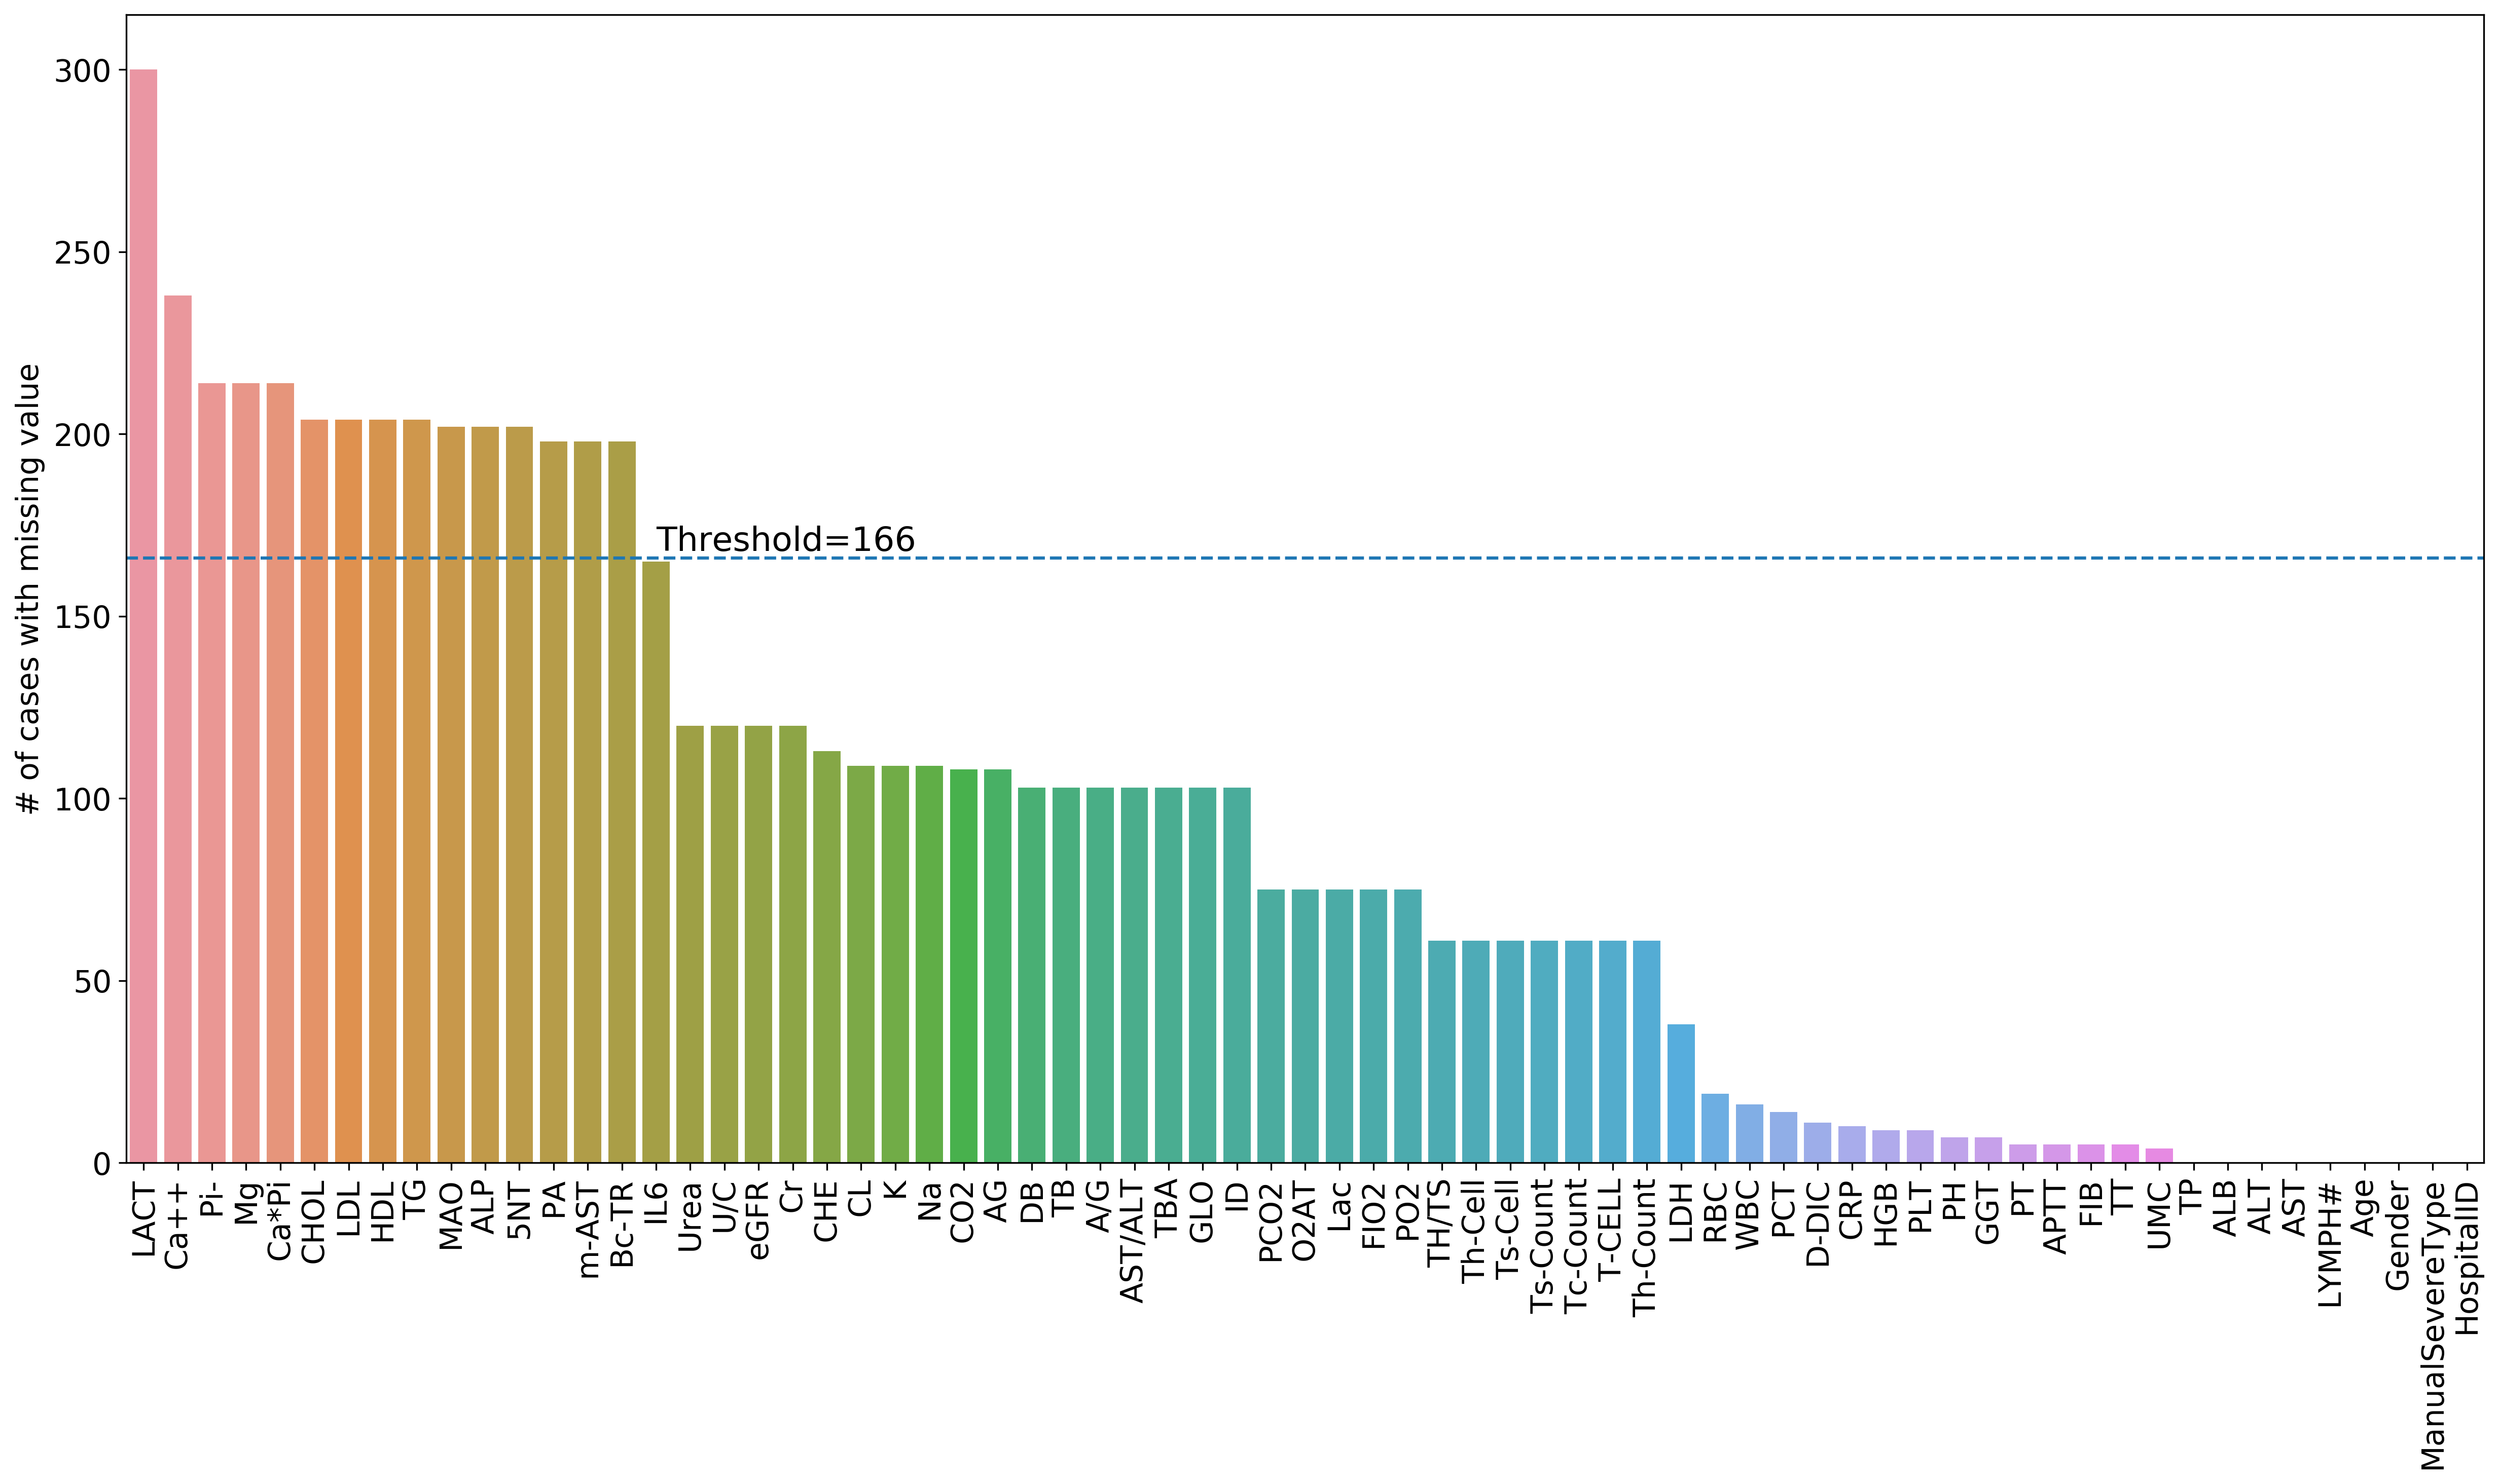

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [10, 20]

params1 = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params1)

fig, ax = plt.subplots(dpi=300)
sns.barplot(x='feature', y='mis_val_count',data=ddd)
plt.axhline(0.5*len(sel_data_df), ls='--')
plt.text(15, 0.5*len(sel_data_df)+2, "Threshold={}".format(int(0.5*len(sel_data_df))), fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('# of cases with missing value')
plt.show()


In [12]:
# find columns having nan values (the number of nan > rate*len(df))
rate = 0.5
col_inx_has_nan = [idx for idx,x in enumerate(sel_data_df.isnull().sum()) if x > rate * len(sel_data_df)]

# get the filter-out columns
print(len(fisrt_labs_f[col_inx_has_nan]))
fisrt_labs_f[col_inx_has_nan]

15


array(['5NT', 'ALP', 'Ca*Pi', 'Ca++', 'MAO', 'Mg', 'Pi-', 'Bc-TR',
       'm-AST', 'PA', 'LACT', 'CHOL', 'HDL', 'LDL', 'TG'], dtype='<U16')

In [13]:
# get the remain columns
remain_col_inx = list(set(range(len(fisrt_labs_f))) - set(col_inx_has_nan))
remain_col_inx.sort()
print(len(remain_col_inx))
final_colnames = fisrt_labs_f[remain_col_inx]
print(final_colnames)

# obtain the final datafram
final_data_df = sel_data_df[final_colnames].copy()

final_data_df.head()

54
['HospitalID' 'UMC' 'ManualSevereType' 'Gender' 'Age' 'HGB' 'LYMPH#' 'PLT'
 'RBC' 'WBC' 'APTT' 'D-DIC' 'FIB' 'PT' 'TT' 'CHE' 'CL' 'GGT' 'K' 'LDH'
 'Na' 'A/G' 'ALB' 'ALT' 'AST' 'AST/ALT' 'DB' 'GLO' 'ID' 'TB' 'TBA' 'TP'
 'FIO2' 'Lac' 'O2AT' 'PCO2' 'PH' 'PO2' 'AG' 'CO2' 'Cr' 'CRP' 'eGFR' 'U/C'
 'Urea' 'T-CELL' 'Tc-Count' 'Th-Cell' 'Th-Count' 'TH/TS' 'Ts-Cell'
 'Ts-Count' 'IL6' 'PCT']


,HospitalID,UMC,ManualSevereType,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,...,Urea,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT
0,0000223383,1.0,Moderate,1,51.0,158.0,0.99,156.0,5.15,3.53,...,NaN,86.3,881.0,48.9,499.0,1.45,33.7,343.0,10.43,0.16
1,0000223107,0.0,Moderate,1,35.0,136.0,1.59,236.0,4.49,4.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.17,0.22
2,0000222709,1.0,Severe,2,65.0,122.0,0.88,161.0,3.96,4.31,...,1.95,66.4,551.0,47.3,392.0,2.83,16.7,139.0,NaN,0.16
3,0000222995,1.0,Critical,1,63.0,170.0,0.31,119.0,5.64,6.79,...,9.81,30.3,93.0,18.7,58.0,1.72,10.9,33.0,79.45,0.12
4,0000223113,0.0,Moderate,1,36.0,151.0,2.37,250.0,5.05,13.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,0.25


In [14]:
final_colnames

array(['HospitalID', 'UMC', 'ManualSevereType', 'Gender', 'Age', 'HGB',
       'LYMPH#', 'PLT', 'RBC', 'WBC', 'APTT', 'D-DIC', 'FIB', 'PT', 'TT',
       'CHE', 'CL', 'GGT', 'K', 'LDH', 'Na', 'A/G', 'ALB', 'ALT', 'AST',
       'AST/ALT', 'DB', 'GLO', 'ID', 'TB', 'TBA', 'TP', 'FIO2', 'Lac',
       'O2AT', 'PCO2', 'PH', 'PO2', 'AG', 'CO2', 'Cr', 'CRP', 'eGFR',
       'U/C', 'Urea', 'T-CELL', 'Tc-Count', 'Th-Cell', 'Th-Count',
       'TH/TS', 'Ts-Cell', 'Ts-Count', 'IL6', 'PCT'], dtype='<U16')

In [15]:
final_data_df.shape

(332, 54)

In [16]:
final_data_df['ManualSevereType'].value_counts()

Moderate        225
Severe           53
Asymptomatic     25
Critical         17
Mild             12
Name: ManualSevereType, dtype: int64

In [17]:
# convert Severity into ordinary value
ord_val = {'Asymptomatic': 1,'Mild': 2, 'Moderate': 3, 'Severe': 4, 'Critical': 5}       

final_data_df['Label'] = final_data_df['ManualSevereType'].apply(lambda x: ord_val[x])
final_data_df['Gender']=final_data_df['Gender']-1
final_data_df.head()

,HospitalID,UMC,ManualSevereType,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,...,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT,Label
0,0000223383,1.0,Moderate,0,51.0,158.0,0.99,156.0,5.15,3.53,...,86.3,881.0,48.9,499.0,1.45,33.7,343.0,10.43,0.16,3
1,0000223107,0.0,Moderate,0,35.0,136.0,1.59,236.0,4.49,4.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.17,0.22,3
2,0000222709,1.0,Severe,1,65.0,122.0,0.88,161.0,3.96,4.31,...,66.4,551.0,47.3,392.0,2.83,16.7,139.0,NaN,0.16,4
3,0000222995,1.0,Critical,0,63.0,170.0,0.31,119.0,5.64,6.79,...,30.3,93.0,18.7,58.0,1.72,10.9,33.0,79.45,0.12,5
4,0000223113,0.0,Moderate,0,36.0,151.0,2.37,250.0,5.05,13.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,0.25,3


# Create dataset for training

In [18]:
y = final_data_df['Label'].values
X_df = final_data_df.drop(columns=['HospitalID', 'ManualSevereType', 'Label']).copy()
X_col_name = list(X_df.columns)
X = X_df.values

# Missing value impute

install missingpy
https://pypi.org/project/missingpy/


In [19]:
from missingpy import MissForest

imputer = MissForest(random_state=1337)
X_imped = imputer.fit_transform(X)

Iteration: 0
Iteration: 1
Iteration: 2


In [20]:
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_imped_norm = scaler.fit_transform(X_imped)

# X_df_imped_norm = pd.DataFrame(X_imped_norm, columns=X_col_name) # XGB可以不用作normalization

X_df_imped_norm = pd.DataFrame(X_imped, columns=X_col_name)
X_df_imped_norm.head()

,UMC,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,APTT,D-DIC,...,Urea,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT
0,1.0,0.0,51.0,158.0,0.99,156.0,5.15,3.53,41.0,0.24,...,5.3010,86.300,881.00,48.900,499.00,1.4500,33.700,343.00,10.4300,0.16
1,0.0,0.0,35.0,136.0,1.59,236.0,4.49,4.62,36.3,0.44,...,5.2416,65.725,1089.44,39.448,641.75,1.7423,23.409,348.87,15.1700,0.22
2,1.0,1.0,65.0,122.0,0.88,161.0,3.96,4.31,37.9,0.65,...,1.9500,66.400,551.00,47.300,392.00,2.8300,16.700,139.00,33.3715,0.16
3,1.0,0.0,63.0,170.0,0.31,119.0,5.64,6.79,38.7,2.85,...,9.8100,30.300,93.00,18.700,58.00,1.7200,10.900,33.00,79.4500,0.12
4,0.0,0.0,36.0,151.0,2.37,250.0,5.05,13.55,27.9,0.22,...,4.6266,68.545,1483.52,40.125,837.17,1.7689,23.213,417.36,1.9200,0.25


In [21]:
imputated_df = X_df_imped_norm.copy()
imputated_df['HospitalID'] = final_data_df['HospitalID']
imputated_df['ManualSevereType'] = final_data_df['ManualSevereType']
imputated_df.head()


,UMC,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,APTT,D-DIC,...,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT,HospitalID,ManualSevereType
0,1.0,0.0,51.0,158.0,0.99,156.0,5.15,3.53,41.0,0.24,...,881.00,48.900,499.00,1.4500,33.700,343.00,10.4300,0.16,0000223383,Moderate
1,0.0,0.0,35.0,136.0,1.59,236.0,4.49,4.62,36.3,0.44,...,1089.44,39.448,641.75,1.7423,23.409,348.87,15.1700,0.22,0000223107,Moderate
2,1.0,1.0,65.0,122.0,0.88,161.0,3.96,4.31,37.9,0.65,...,551.00,47.300,392.00,2.8300,16.700,139.00,33.3715,0.16,0000222709,Severe
3,1.0,0.0,63.0,170.0,0.31,119.0,5.64,6.79,38.7,2.85,...,93.00,18.700,58.00,1.7200,10.900,33.00,79.4500,0.12,0000222995,Critical
4,0.0,0.0,36.0,151.0,2.37,250.0,5.05,13.55,27.9,0.22,...,1483.52,40.125,837.17,1.7689,23.213,417.36,1.9200,0.25,0000223113,Moderate


In [22]:
imputated_df.to_csv('imputed_missing_value_332.dat', sep='\t', index=False)

# Using Xgb as ordinary regression

In [23]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
data_dmatrix = xgb.DMatrix(data=X_df_imped_norm,label=y)
# data_dmatrix = xgb.DMatrix(data=X,label=y)

In [24]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.5,
          'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=500,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)


cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.524561,0.022297,1.561131,0.092843
1,0.981466,0.029657,1.050814,0.078845
2,0.740593,0.031699,0.851963,0.058047
3,0.614442,0.042145,0.785587,0.040372
4,0.540515,0.034844,0.751556,0.046403


In [25]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.524561,0.022297,1.561131,0.092843
1,0.981466,0.029657,1.050814,0.078845
2,0.740593,0.031699,0.851963,0.058047
3,0.614442,0.042145,0.785587,0.040372
4,0.540515,0.034844,0.751556,0.046403
5,0.501738,0.029484,0.737026,0.042107
6,0.479204,0.027980,0.729397,0.036574
7,0.457436,0.023637,0.722974,0.038187
8,0.446959,0.022359,0.719288,0.037192
9,0.441147,0.021672,0.719135,0.039376


In [26]:
print((cv_results["test-rmse-mean"]).tail(1))

15    0.716753
Name: test-rmse-mean, dtype: float64


In [67]:
######################
## Helper Functions ##
######################
#### sigmoid
def sigmoid(score):
    p = 1. / (1. + np.exp(-score))
    return p

#### softmax
def softmax(score):
    score = np.asarray(score, dtype=float)
    score = np.exp(score-np.max(score))
    score /= np.sum(score, axis=1)[:,np.newaxis]
    return score


##########################
## Cutomized Objectives ##
##########################
#### Implement the method described in the paper:
# Ordinal Regression by Extended Binary Classification
# Ling Li, Hsuan-Tien Lin
def ebcObj(preds, dtrain):
    ## label are +1/-1
    labels = dtrain.get_label()
    weights = dtrain.get_weight()
    ## extended samples within the feature construction part
    if np.min(labels) == -1 and np.max(labels) == 1:
        s = np.exp(labels * preds)
        grad = - weights * labels / (1. + s)
        hess = weights * (labels**2) * s / ((1. + s)**2)
        ## TODO: figure out how to apply sample weights
    ## extended samples within the objective value computation part
    else:
        ## label are in [0,1,2,3]
#         labels += 1
        M = preds.shape[0]
        N = preds.shape[1]
        grad = np.zeros((M,N), dtype=float)
        hess = np.zeros((M,N), dtype=float)
        ## we only use the first K-1 class for extended examples
        for c in range(N-1):
            k = c+1
            Y = 2. * np.asarray(labels > k, dtype=float) - 1.
            C_yk = np.power(Y - k, 2)
            C_yk1 = np.power(Y - (k+1), 2)
            w = np.abs(C_yk - C_yk1)
            p = preds[:,c]
            s = np.exp(Y * p)
            grad[:,c] = - w * Y / (1. + s)
            hess[:,c] = w * (Y**2) * s / ((1. + s)**2)
        ## apply sample weights
#         grad *= weights[:,np.newaxis]
#         hess *= weights[:,np.newaxis]
        grad.shape = (M*N)
        hess.shape = (M*N)
    return grad, hess

#### Implement the method described in the paper:
# Improving ranking performance with cost-sensitive ordinal classification via regression
# Yu-Xun Ruan, Hsuan-Tien Lin, and Ming-Feng Tsai
def cocrObj(preds, dtrain):
    ## label are in [0,1,2,3]
    Y = dtrain.get_label()
    Y = Y[:,np.newaxis]
    
    ## get sample weights
    weights = dtrain.get_weight()
    weights = weights[:,np.newaxis]
    ##
    M,N = preds.shape
    k = np.asarray(range(1,N+1))
    k = k[np.newaxis,:]
    b = np.asarray(Y >= k)
    C_yk = np.power(Y - k, 2)
    C_yk1 = np.power(Y - (k-1), 2)
    w = np.abs(C_yk - C_yk1)
    grad = 2 * w * (preds - b)
    hess = 2 * w

    ## apply sample weights
#     grad *= weights
#     hess *= weights
    grad.shape = (M*N)
    hess.shape = (M*N)
    return grad, hess

#### decoding method for EBC
def applyEBCRule(preds, hard_threshold=False):
    if len(preds.shape) == 1:
        ## get prediction
        numOfSample = len(preds)/(config.n_classes-1)
        if hard_threshold:
            r = np.ones((numOfSample), dtype=int)
        else:
            r = np.ones((numOfSample), dtype=float)
        for c in range(config.n_classes-1):
            if hard_threshold:
                r += np.asarray(preds[c*numOfSample:(c+1)*numOfSample] > 0, dtype=int)
            else:
                r += preds[c*numOfSample:(c+1)*numOfSample]
    elif preds.shape[1] == 5:
        if hard_threshold:
            r = np.sum(np.asarray(preds[:,:4]>0), axis=1)
        else:
            r = np.sum(preds[:,:4], axis=1)
    return r

#### decoding method for COCR
def applyCOCRRule(preds):
    r = np.sum(preds, axis=1) 
    return r

In [81]:
n_lab = 5
lab_mat = np.zeros((len(y), n_lab)) # 5 severities
for idxx, ele_i in enumerate(y):
    lab_mat[idxx]=np.array([1]*ele_i + [0]*(n_lab-ele_i))

data_dmatrix1 = xgb.DMatrix(data=X_df_imped_norm,label=y)


## ebc with xgboost
# obj = lambda preds, dtrain: ebcObj(preds, dtrain)
obj = lambda preds, dtrain: cocrObj(preds, dtrain)

params1 = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.5,
          'max_depth': 5, 'alpha': 10, 'num_class':5}

bst = xgb.train(params1, data_dmatrix1, obj=obj, num_boost_round=500)
# pred = bst.predict(data_dmatrix1)
# pred = applyCOCRRule(pred)
pred=bst.predict(data_dmatrix1)
pred = applyEBCRule(pred, hard_threshold=False)

In [82]:
pred

array([3.0280304, 2.9280772, 3.7216473, 3.8554363, 2.6640568, 3.9492335,
       3.9858103, 3.7835636, 3.2078857, 2.5412014, 3.9543228, 3.1120846,
       3.7773008, 3.1880383, 2.9318233, 3.2091858, 3.3944151, 2.9486723,
       3.0628767, 2.9065526, 3.2874842, 3.8652458, 3.149595 , 3.0511997,
       3.9969692, 2.3318937, 2.8598447, 2.991946 , 3.131626 , 3.8238275,
       2.5746253, 2.8301487, 3.2002249, 3.914388 , 3.586907 , 3.7948158,
       2.6343741, 4.100992 , 3.1274595, 3.2134595, 4.0079956, 3.0465255,
       2.8713894, 3.846965 , 3.7124796, 4.0007577, 2.9754903, 2.3618646,
       3.3220305, 3.7155442, 2.9370282, 2.9897625, 3.1101418, 1.8327101,
       2.885916 , 3.0371416, 4.0057034, 3.866328 , 2.894716 , 4.039504 ,
       3.515871 , 3.5623739, 2.904856 , 3.1094348, 2.979689 , 3.0896313,
       3.989545 , 3.1247246, 2.2505019, 3.7673728, 1.3311149, 3.5725899,
       2.5216327, 2.7384725, 3.283409 , 3.44628  , 3.1567001, 2.8577363,
       2.9894047, 2.8749986, 3.5333736, 3.1810863, 

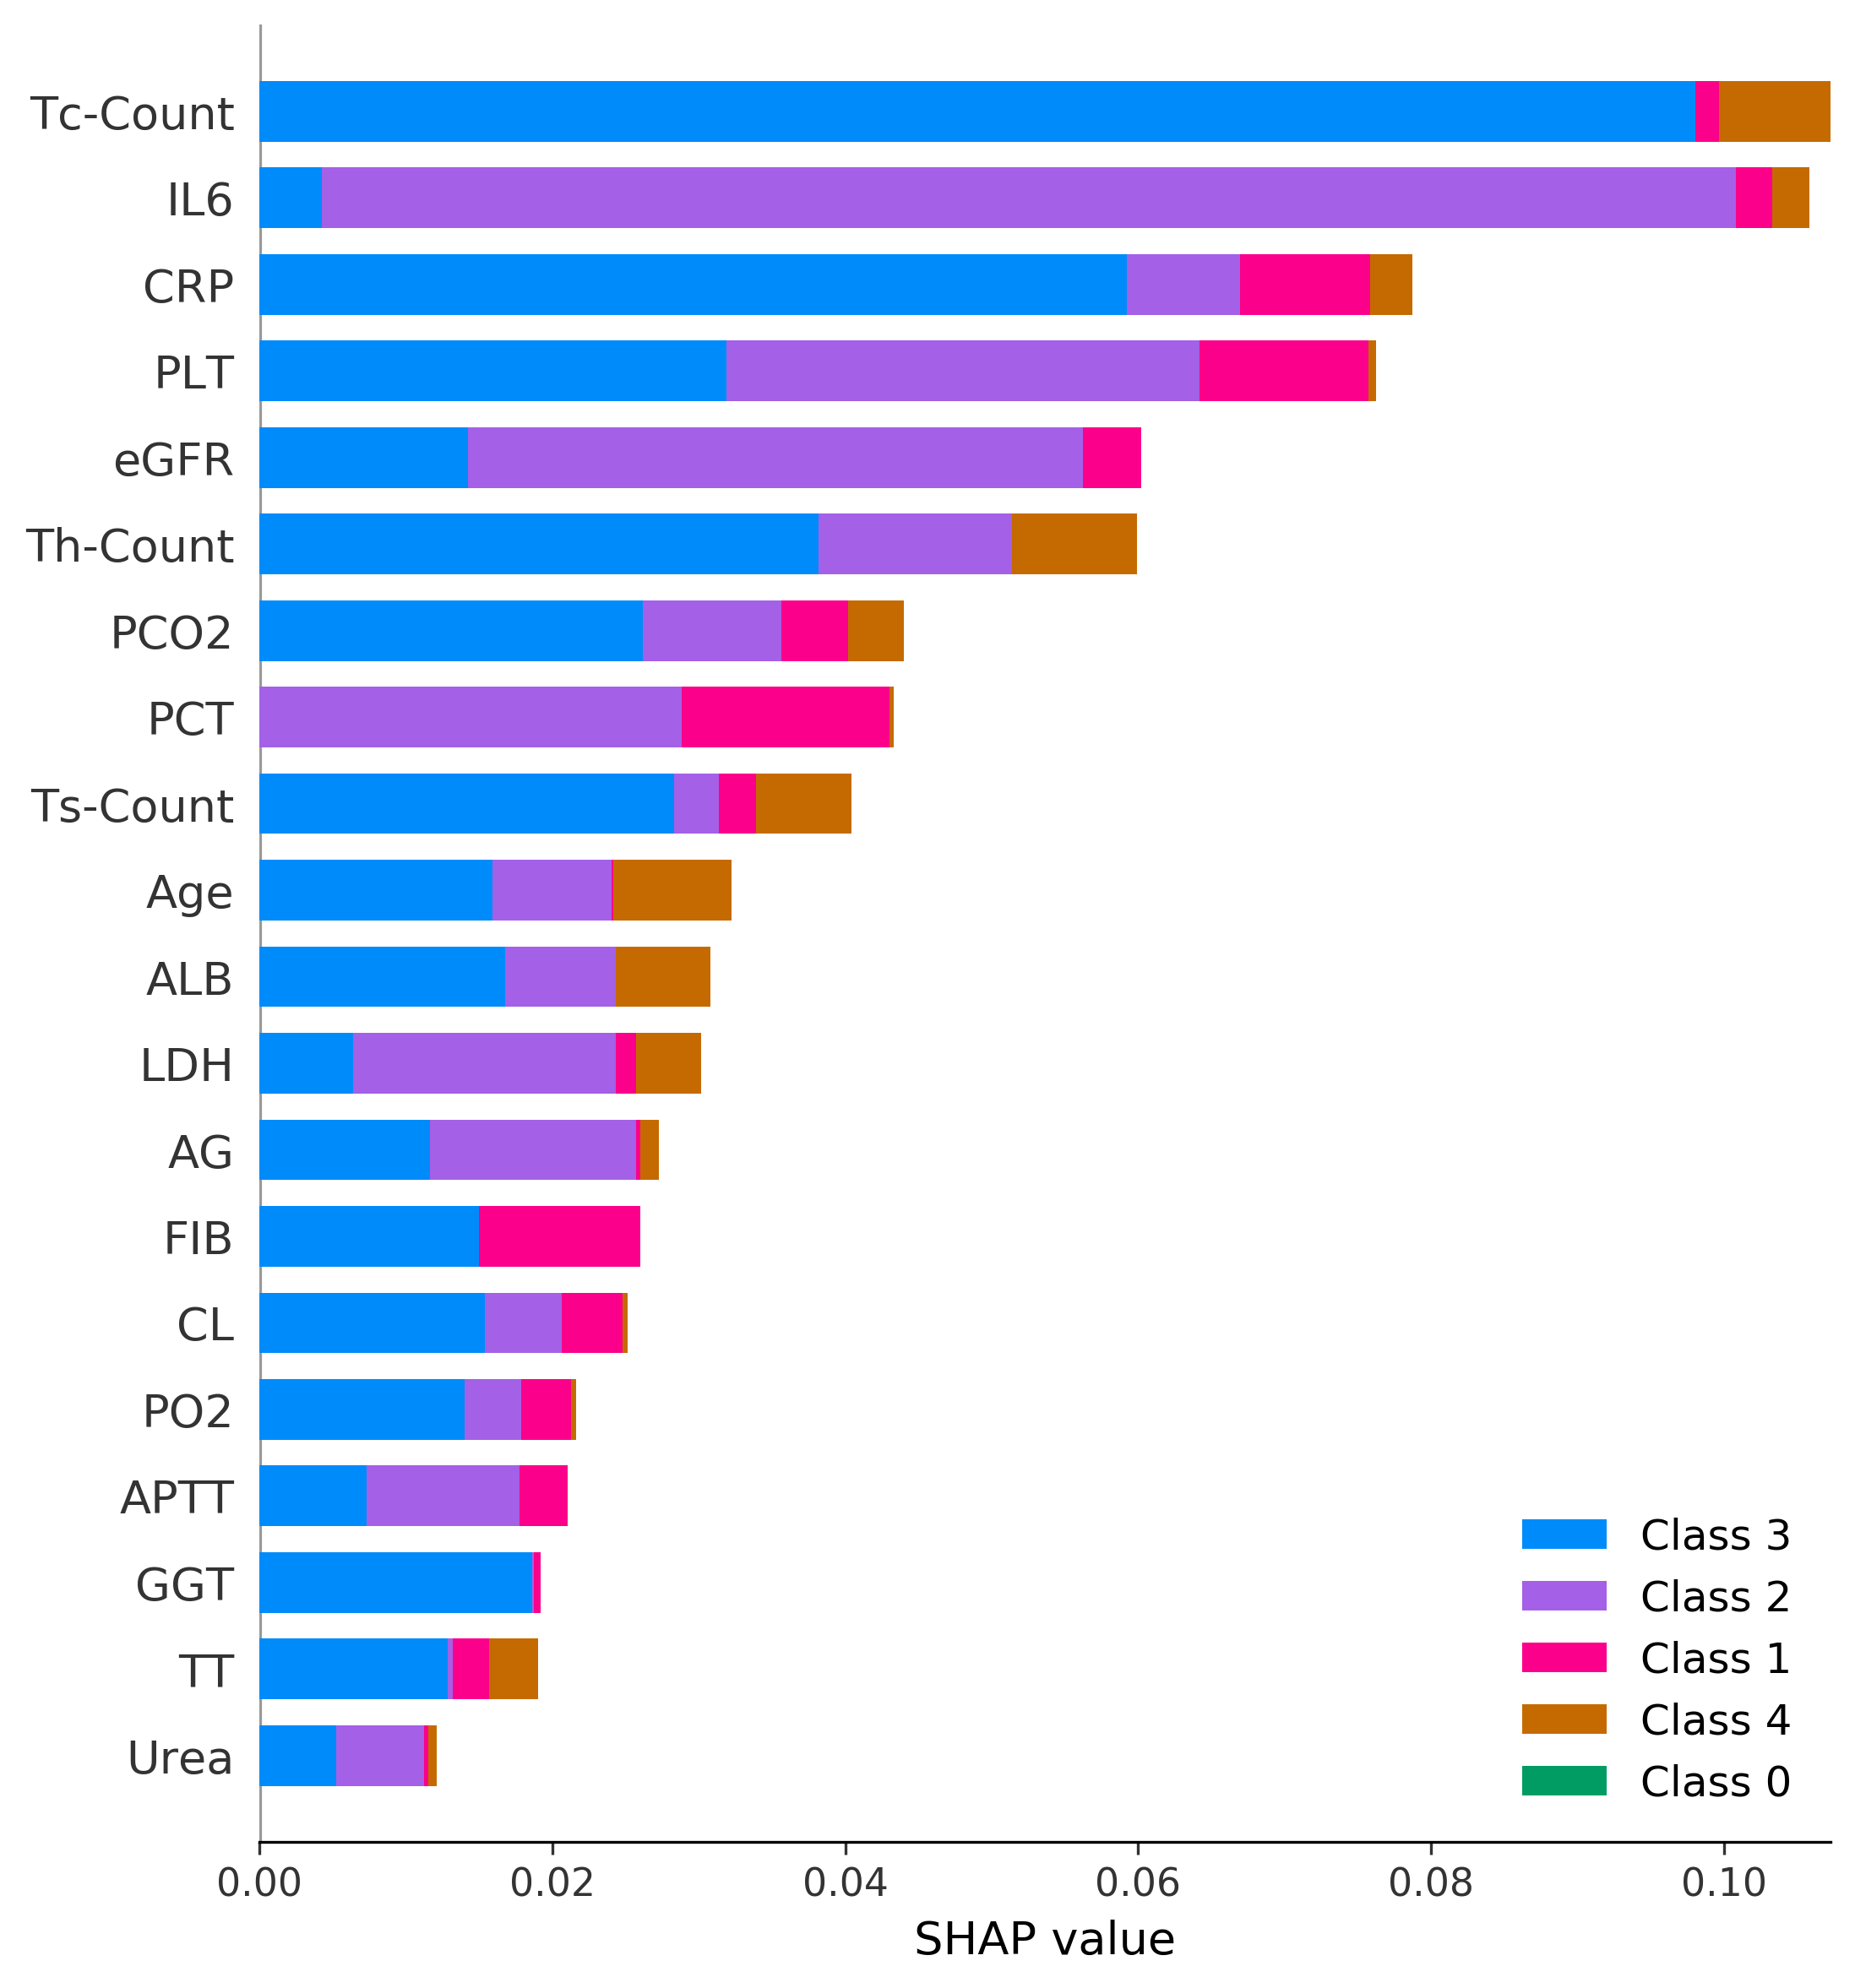

In [83]:
import shap
top_feat = 20
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X_df_imped_norm)

import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [10, 20]

params1 = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 20),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params1)

fig, ax = plt.subplots(dpi=300)
shap.summary_plot(shap_values, X_df_imped_norm, show=False, max_display=top_feat)
plt.xlabel("SHAP value")

plt.show()

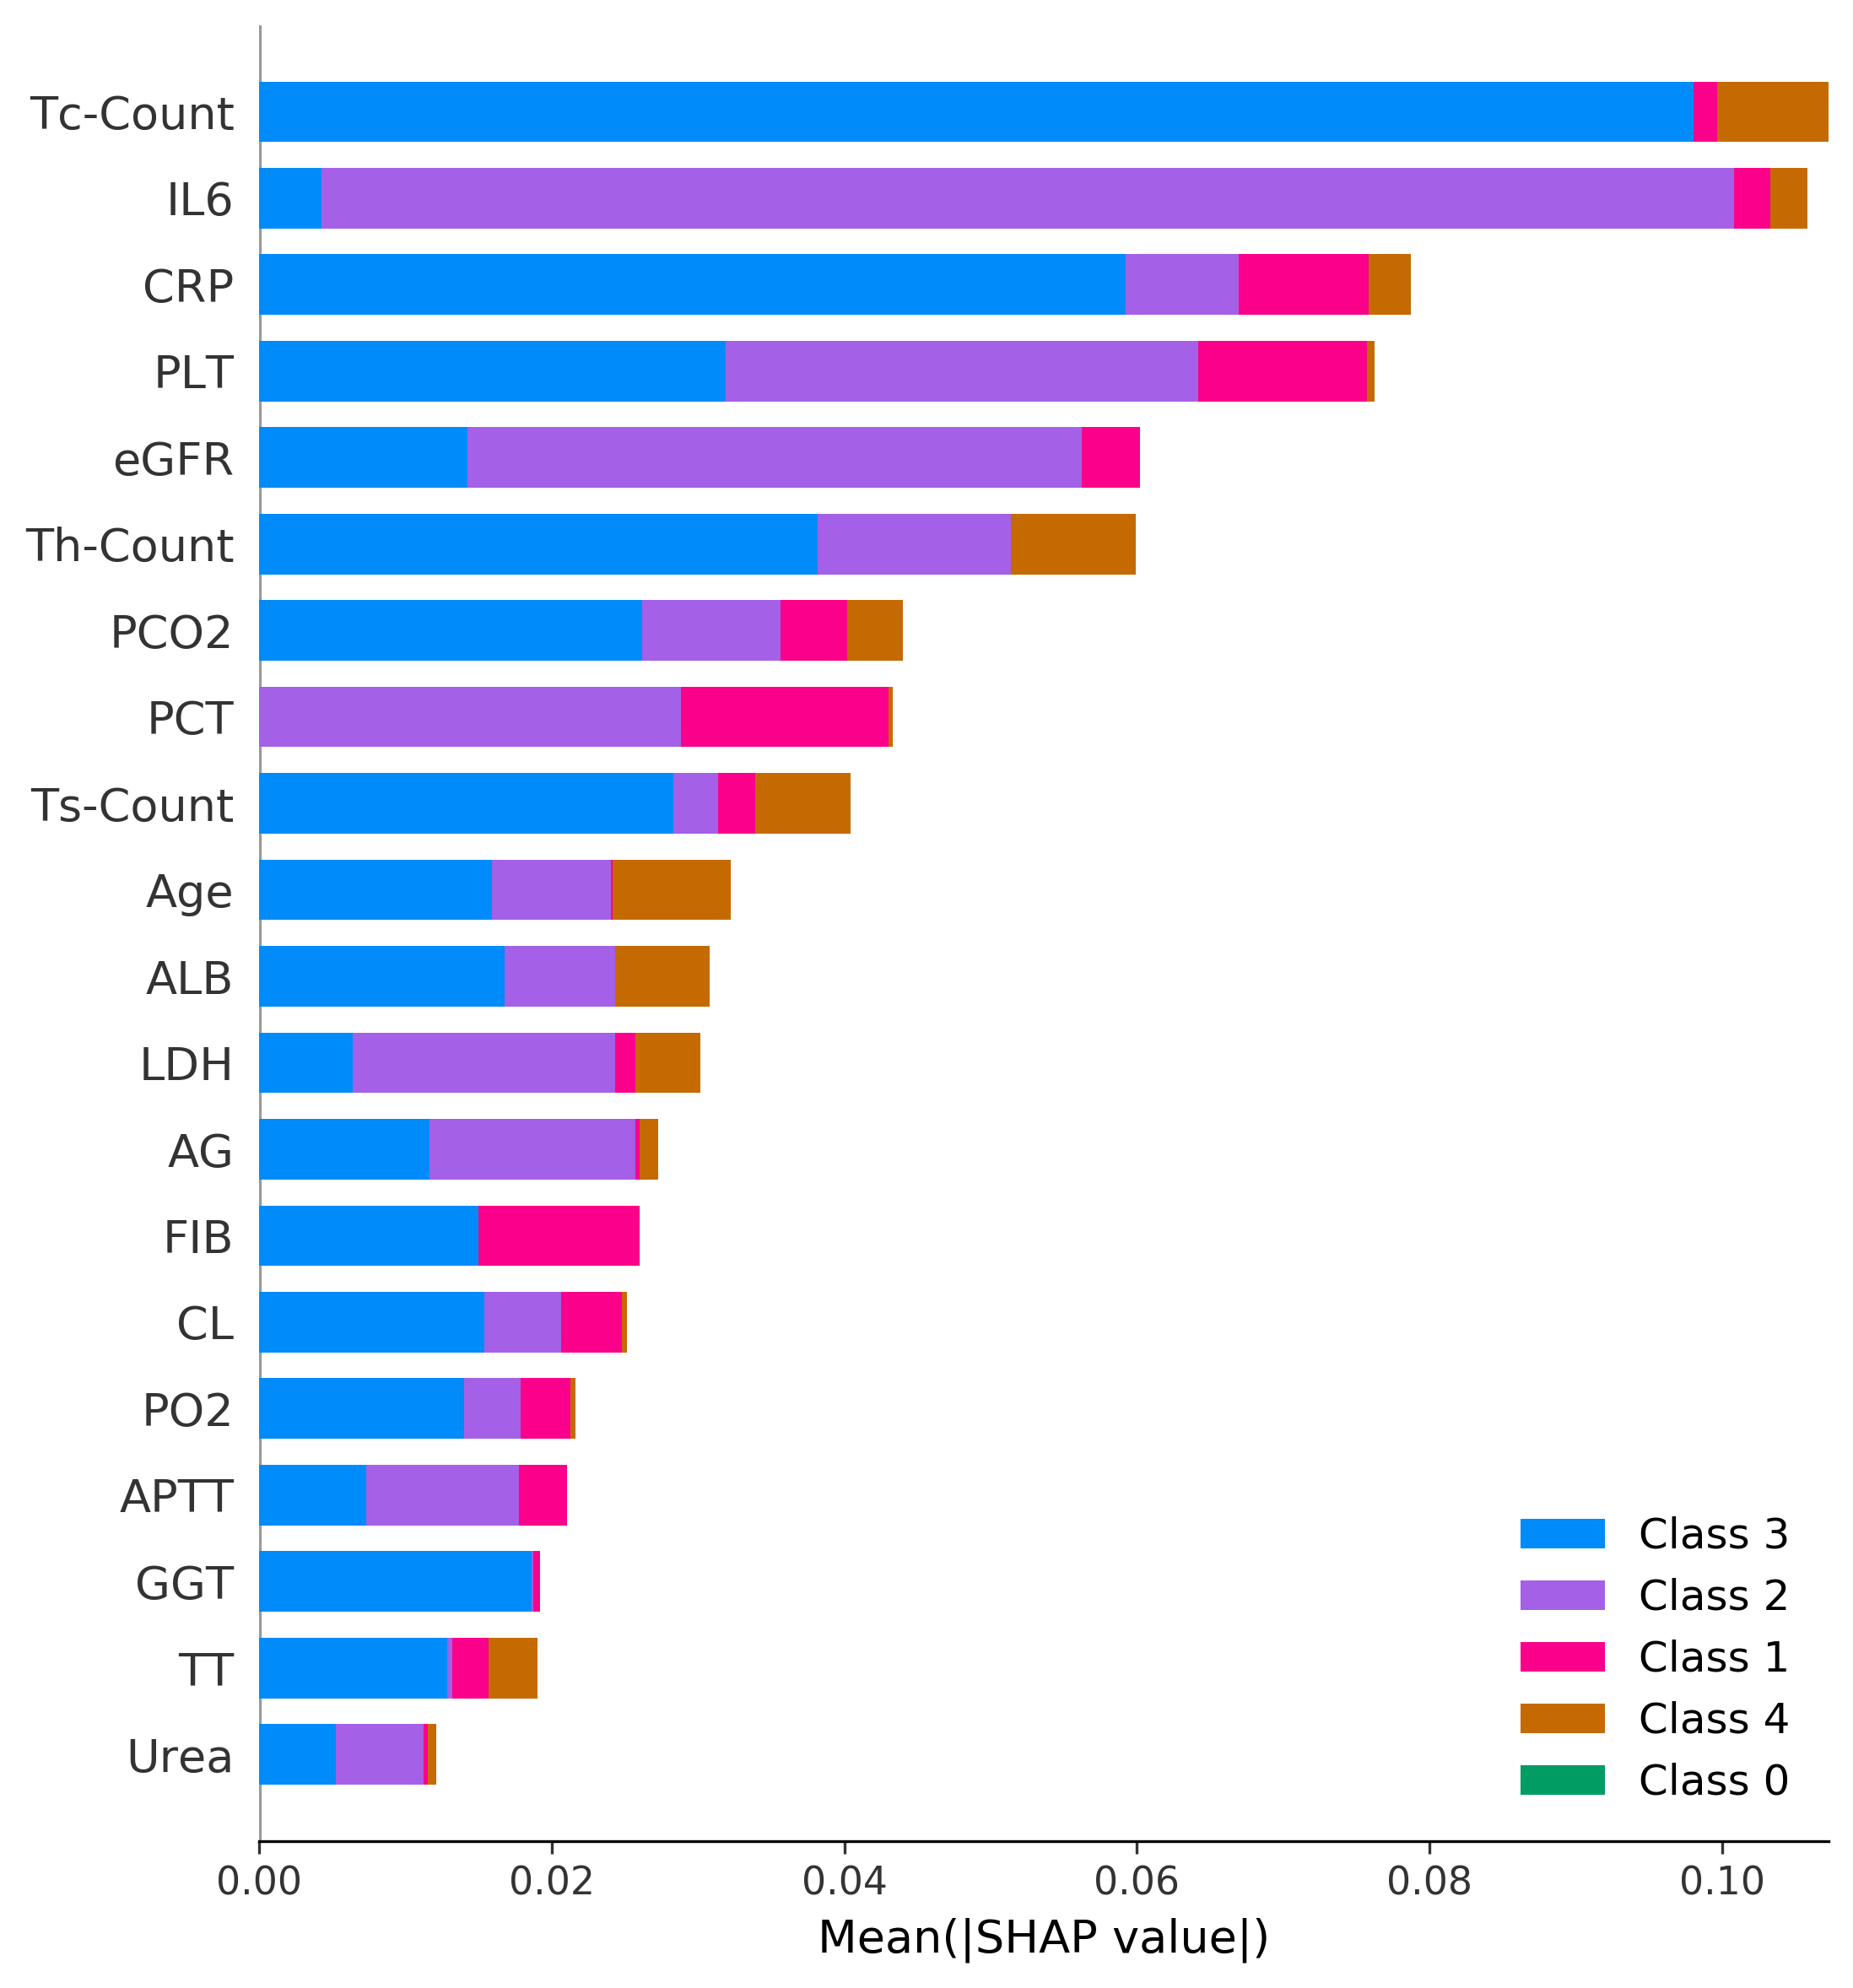

In [73]:
params1 = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 20),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params1)

fig, ax = plt.subplots(dpi=300)
shap.summary_plot(shap_values, X_df_imped_norm, plot_type="bar", show=False)
plt.xlabel("Mean(|SHAP value|)")
plt.show()

In [32]:
X_df_imped_4vis = pd.DataFrame(X_imped, columns=X_col_name)
new_x_df = X_df_imped_4vis[list(X_df_imped_4vis.columns[np.argsort(np.abs(shap_values).mean(0))[::-1]][:top_feat])]

In [33]:
xg_reg2 = XGBRegressor(**params)
xg_reg2.fit(new_x_df, y)

XGBRegressor(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.5, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='rank:pairwise', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=None, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [34]:
y_pred = xg_reg2.predict(new_x_df)
# y_pred_adj = np.array([1 if x < 1 else 5 if x > 5 else x for x in y_pred ])
y_pred_adj = y_pred
y_pred_adj_lab = np.round(y_pred_adj)

In [35]:
pred_df = pd.DataFrame(data={'HospitalID': final_data_df['HospitalID'].values,
                            'ManualSevereType': final_data_df['ManualSevereType'].values,
                            #'Y_true': final_data_df['Label'].values,
                            'Score': y_pred_adj,
                            #'Y_pred_label': y_pred_adj_lab
                            })

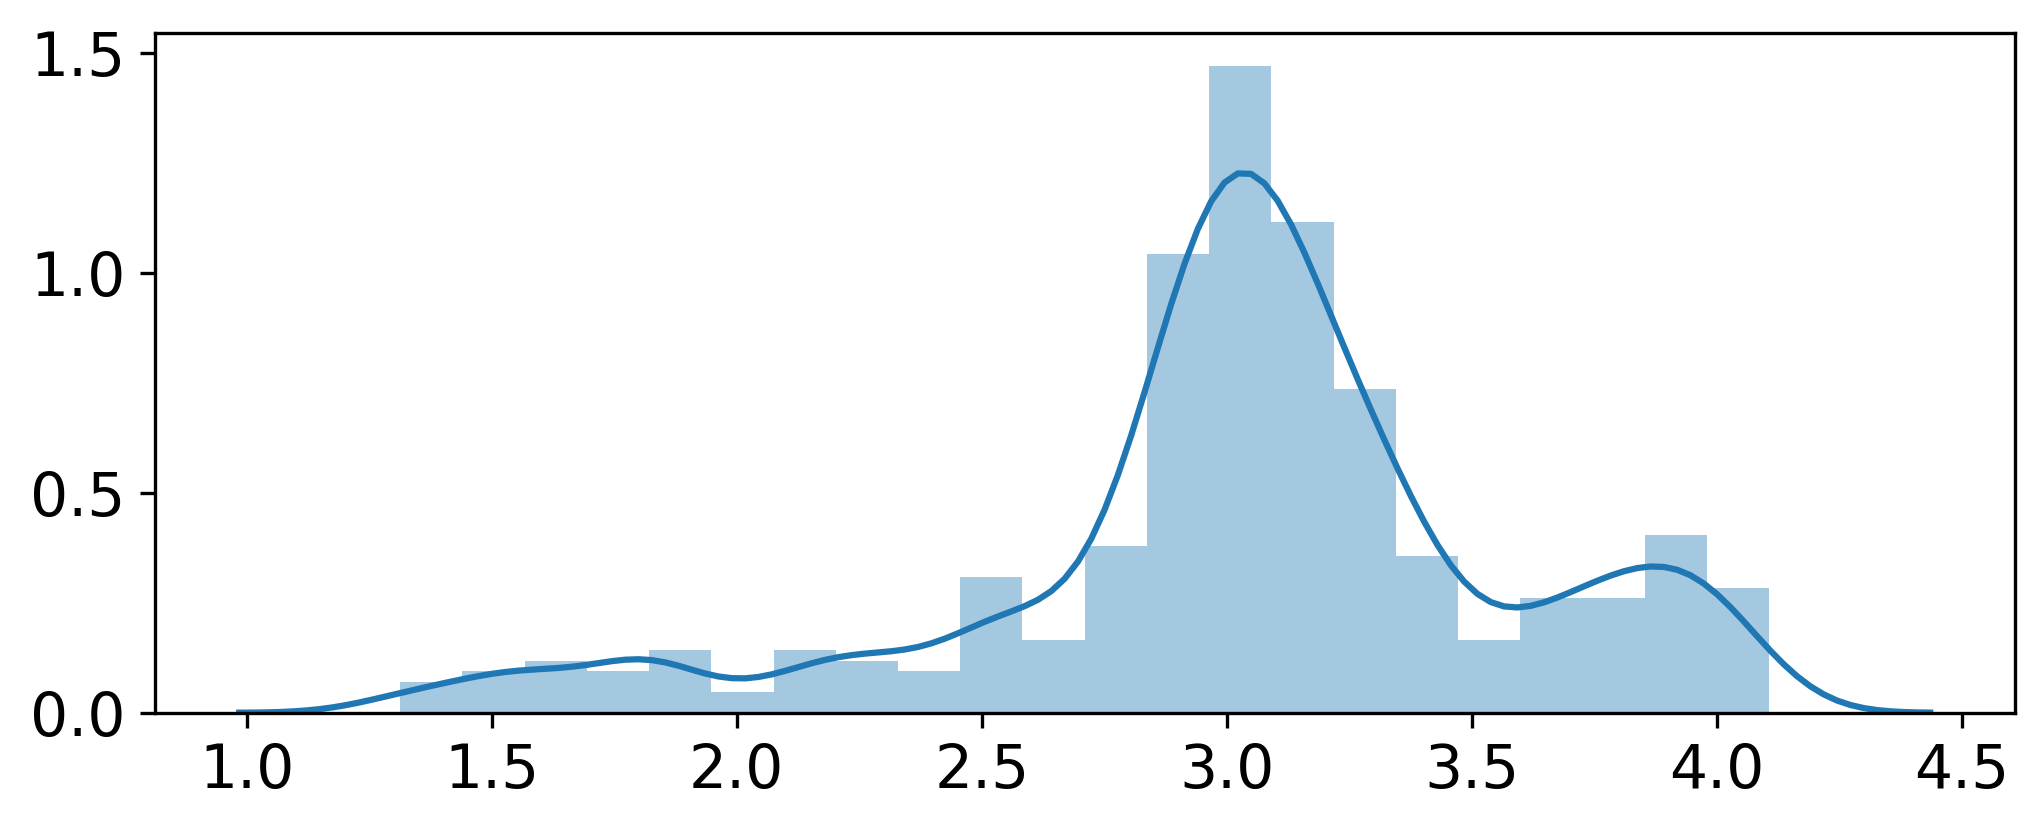

In [84]:
fig, ax = plt.subplots(1,1,figsize=(8, 3), dpi=300)
sns.distplot(pred, kde=True,ax=ax)
# plt.hist(pred_df['Score'].values)

In [38]:
pred_df.head(20)

,HospitalID,ManualSevereType,Score
0,0000223383,Moderate,0.495353
1,0000223107,Moderate,-0.495510
2,0000222709,Severe,3.229083
3,0000222995,Critical,3.364715
4,0000223113,Moderate,-2.488782
5,0000223093,Critical,2.988753
6,0000223417,Critical,2.581276
7,0000223498,Severe,2.717530
8,0000223487,Moderate,0.810686
9,0000223728,Moderate,-0.238515


In [38]:
pred_df.to_csv('xgb_score_v332.dat', sep='\t', index=False)